<a href="https://colab.research.google.com/github/codybaraks/Mchezopesa-Ltd/blob/master/Mchezopesa_Ltd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DEFINE QUESTION**

## **METRICS FOR SUCCESS**

## **THE CONTEXT**

## **EXPERIEMENTAL DESIGN**

In [0]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
import pandas_profiling as pp

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
%matplotlib inline

In [301]:
# Load fifa ranking dataset
fifa_ranking = pd.read_csv("fifa_ranking.csv")
fifa_ranking.head(5)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [302]:
# Loading the Dataset
# Reading the dataset
fifa = pd.read_csv("results.csv")
fifa.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [277]:
# fifa ranking shape
fifa_ranking.shape

(57793, 16)

In [278]:
# Checking the shape of the results dataset
fifa.shape

(40839, 9)

Consists of about 9 columns

In [279]:
# fifa ranking size
fifa_ranking.size

924688

In [280]:
# Check the size of the results dataset
fifa.size


367551

In [281]:
# results fifa ranking dataset info
fifa_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null object
dtypes: float64(9), int64(3), object(4)
memory usage: 7.1+ MB


In [282]:
# Getting  a bit information from the dataframe
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
date          40839 non-null object
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [283]:
# Describing the data
fifa.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [284]:
pp.ProfileReport(fifa) # pandas


Number of variables,9
Number of observations,40839
Total Missing (%),0.0%
Total size in memory,2.5 MiB
Average record size in memory,65.0 B
Numeric,2
Categorical,6
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [285]:
fifa_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null object
dtypes: float64(9), int64(3), object(4)
memory usage: 7.1+ MB


In [0]:
# ## Dropping irrelevant columns  -  fifa ranking
fifa_ranking = fifa_ranking.drop(['country_abrv','cur_year_avg',
      'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
      'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
      'three_year_ago_weighted'], axis=1)

In [0]:
# fifa = fifa.drop([''])

In [304]:
# Merge the two datasets
# "pd.merge(df1, df2, on='employee')"
# fifa_main = pd.concat([fifa_ranking, fifa, on=""], axis=1 )
# fifa_main
# pd.merge(fifa_ranking, fifa, on='employee')")
fifa_main = fifa_ranking.merge(fifa, left_on="country_full", right_on="country")
fifa_main.head()

,rank,country_full,total_points,previous_points,rank_change,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,Germany,0.0,57,0,UEFA,1993-08-08,1909-04-04,Germany,Switzerland,1,0,Friendly,Karlsruhe,Germany,False
1,1,Germany,0.0,57,0,UEFA,1993-08-08,1910-05-16,Germany,Belgium,0,3,Friendly,Duisburg,Germany,False
2,1,Germany,0.0,57,0,UEFA,1993-08-08,1910-10-16,Germany,Netherlands,1,2,Friendly,Kleve,Germany,False
3,1,Germany,0.0,57,0,UEFA,1993-08-08,1911-03-26,Germany,Switzerland,6,2,Friendly,Stuttgart,Germany,False
4,1,Germany,0.0,57,0,UEFA,1993-08-08,1911-10-09,Germany,Austria,1,2,Friendly,Dresden,Germany,False


In [289]:
fifa_main.head(2)

,rank,country_full,total_points,previous_points,rank_change,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,Germany,0.0,57,0,1993-08-08,1909-04-04,Germany,Switzerland,1,0,Friendly,Karlsruhe,Germany,False
1,1,Germany,0.0,57,0,1993-08-08,1910-05-16,Germany,Belgium,0,3,Friendly,Duisburg,Germany,False


In [290]:
fifa_main.dropna()

,rank,country_full,total_points,previous_points,rank_change,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,Germany,0.00,57,0,1993-08-08,1909-04-04,Germany,Switzerland,1,0,Friendly,Karlsruhe,Germany,False
1,1,Germany,0.00,57,0,1993-08-08,1910-05-16,Germany,Belgium,0,3,Friendly,Duisburg,Germany,False
2,1,Germany,0.00,57,0,1993-08-08,1910-10-16,Germany,Netherlands,1,2,Friendly,Kleve,Germany,False
3,1,Germany,0.00,57,0,1993-08-08,1911-03-26,Germany,Switzerland,6,2,Friendly,Stuttgart,Germany,False
4,1,Germany,0.00,57,0,1993-08-08,1911-10-09,Germany,Austria,1,2,Friendly,Dresden,Germany,False
5,1,Germany,0.00,57,0,1993-08-08,1911-10-29,Germany,Sweden,1,3,Friendly,Hamburg,Germany,False
6,1,Germany,0.00,57,0,1993-08-08,1911-12-17,Germany,Hungary,1,4,Friendly,Munich,Germany,False
7,1,Germany,0.00,57,0,1993-08-08,1912-11-17,Germany,Netherlands,2,3,Friendly,Leipzig,Germany,False
8,1,Germany,0.00,57,0,1993-08-08,1913-05-18,Germany,Switzerland,1,2,Friendly,Freiburg,Germany,False
9,1,Germany,0.00,57,0,1993-08-08,1913-10-26,Germany,Denmark,1,4,Friendly,Hamburg,Germany,False


In [0]:
# sns.heatmap(fifa_main, annot=True)

In [292]:
# Checking for null values after concatinating
fifa_main.isnull().sum()

rank               0
country_full       0
total_points       0
previous_points    0
rank_change        0
rank_date          0
date               0
home_team          0
away_team          0
home_score         0
away_score         0
tournament         0
city               0
country            0
neutral            0
dtype: int64

In [293]:
fifa_ranking.head(2)

,rank,country_full,total_points,previous_points,rank_change,rank_date
0,1,Germany,0.0,57,0,1993-08-08
1,2,Italy,0.0,57,0,1993-08-08


In [294]:
# Convert to neutral column to Binary
conv = pd.get_dummies(fifa_main['neutral'], drop_first=True)
conv

,True
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [0]:
fifa_main["neutral"]= conv[True]

In [306]:
# # Checking corelation
# sns.heatmap(fifa_main)
fifa_main.dtypes

rank                 int64
country_full        object
total_points       float64
previous_points      int64
rank_change          int64
confederation       object
rank_date           object
date                object
home_team           object
away_team           object
home_score           int64
away_score           int64
tournament          object
city                object
country             object
neutral              uint8
dtype: object

In [307]:
fifa_main['home_score'].corr(fifa_main['rank'])

-0.08875851785468925

In [308]:
fifa_main.shape

(10246510, 16)

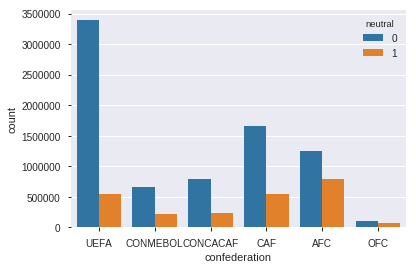

In [309]:
sns.countplot(x='confederation', data=fifa_main, hue='neutral')

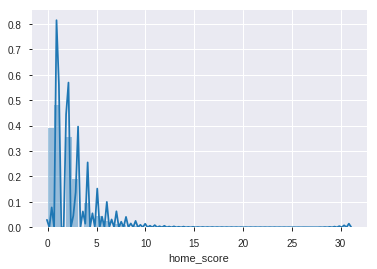

In [310]:
# Distribution plot
# distplot
sns.distplot(fifa_main['home_score'])

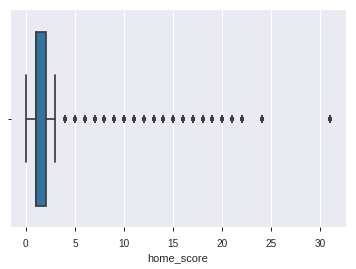

In [311]:
sns.boxplot(x = 'home_score',hue='away_score',data=fifa_main)

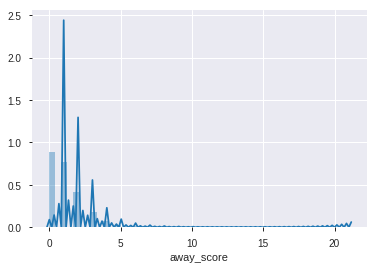

In [312]:
# Distribution plot fo away score
# distplot
sns.distplot(fifa_main['away_score'])

In [0]:
fifa_main.head(1)

In [0]:
fifa_main.dtypes

## **Polynomial Regression -  Approach 1**

In [0]:
# Checking if columns have been droped
# X.head(5)

In [0]:
# sns.heatmap(X)
fifa_main['home_score'].corr(fifa_main['rank'])

In [0]:
fifa_main['home_score'].corr(fifa_main['total_points'])

In [0]:
fifa_main['home_score'].corr(fifa_main['previous_points'])

In [0]:
fifa_main['home_score'].corr(fifa_main['rank_change'])

In [0]:
fifa_main.dtypes

In [0]:
# Split the dataset
# X = wine.drop(['quality'],axis=1)
# X = fifa_main.drop(['country_full','country_abrv','confederation','rank_date','date', 'home_team','away_team','tournament','city','country'],axis=1)
X = fifa_main['rank'].values
y = fifa_main['home_score'].values

X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [341]:
print(X)
print(y)

[[  1]
 [  1]
 [  1]
 ...
 [195]
 [195]
 [195]]
[[1]
 [0]
 [1]
 ...
 [2]
 [0]
 [0]]


In [0]:
# Import train test split
from sklearn.model_selection import train_test_split

In [0]:
# Train the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [344]:
X.shape

(10246510, 1)

In [345]:
y.shape

(10246510, 1)

In [346]:
# Fit polynormial regression to dataset
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)

pol_li = LinearRegression()
pol_li.fit(X_poly,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [347]:
# Fit a Linear Regression
fifa_reg = LinearRegression()
fifa_reg.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

ValueError: ignored

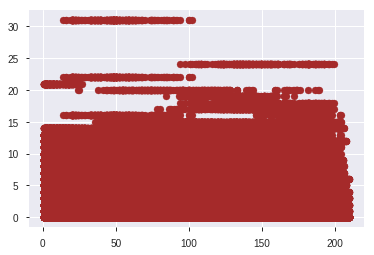

In [391]:
# Plotting LogisticRegression

plt.scatter(X,y,color="brown")
plt.plot(X,pol_li,color="red")
plt.title("Home scores And  Rank", color="brown")
plt.xlabel("Ranking",color="brown")
plt.ylabel("Home Score",color="brown")

In [0]:
# Carrying out the prediction
# Predict using Polynomial Regression

y_predict = fifa_reg.predict(X_poly)


Text(0, 0.5, 'Home Score')

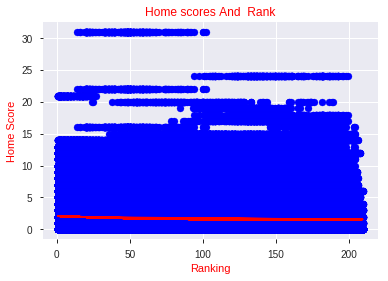

In [390]:
plt.scatter(X,y,color="blue")
plt.plot(X,y_predict,color="red")
plt.title("Home scores And  Rank", color="red")
plt.xlabel("Ranking",color="red")
plt.ylabel("Home Score",color="red")

In [356]:
fifa_main['rank'].nunique()

209

In [370]:
# Linear Regression Predition
print("prediction for Linear Regression is", y_test)

prediction for Linear Regression is [[1]
 [0]
 [3]
 ...
 [3]
 [0]
 [0]]


In [363]:
# Polynomial Regression Predition
print("prediction for Polynomial Regression is", y_predict)

prediction for Polynomial Regression is [[2.07455747]
 [2.07455747]
 [2.07455747]
 ...
 [1.56310882]
 [1.56310882]
 [1.56310882]]


**Predition for The number of goals scored by the Home team is 2**

In [371]:
y_predict

array([[2.07455747],
       [2.07455747],
       [2.07455747],
       ...,
       [1.56310882],
       [1.56310882],
       [1.56310882]])

In [384]:
fifa_main.describe()

,rank,total_points,previous_points,rank_change,home_score,away_score,neutral
count,1.024651e+07,1.024651e+07,1.024651e+07,1.024651e+07,1.024651e+07,1.024651e+07,1.024651e+07
mean,6.916505e+01,1.723781e+02,4.595844e+02,-2.483255e-02,1.734292e+00,1.179052e+00,2.343649e-01
std,5.084864e+01,3.363458e+02,3.535447e+02,5.381888e+00,1.733112e+00,1.381282e+00,4.236012e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,-7.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.500000e+01,0.000000e+00,1.400000e+02,-2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,6.100000e+01,0.000000e+00,4.430000e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
75%,1.050000e+02,1.966300e+02,6.590000e+02,1.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00
max,2.090000e+02,1.775030e+03,1.920000e+03,9.200000e+01,3.100000e+01,2.100000e+01,1.000000e+00


In [385]:
# Getting the RMSE Score
from sklearn import metrics
print('Root mean squaref Error:',np.sqrt(metrics.mean_squared_error(y,y_predict)))

Root mean squaref Error: 1.724651870196694


In [387]:
# Geting the R2 Score
print("The R2 score is",metrics.r2_score(y,y_predict))

The R2 score is 0.009738708682066277


In [392]:
# Actual vs Prediction
compar = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
compar.describe()

ValueError: ignored

In [388]:
comparison.describe()

NameError: ignored

## **Model 2: Predict how many goals the away team scores**

In [0]:
plt.scatter(x,y,color=’red’)
plt.plot(x,regressor.predict(poly.fit_transform(x)),color=’blue’)
plt.show()

In [0]:
sns.heatmap(fifa_main)

In [0]:
# Pairplot
g = sns.pairplot(fifa_main[['home_score','away_score']])
g